In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn import tree
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
%%HTML
<h3> Import Data </h3>

In [3]:
dftrain = pd.read_csv('mnist_train.csv')
dftest = pd.read_csv('mnist_test.csv')

In [4]:
#explore testing and training data for feature types and missing values
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
#check for missing values
dftrain.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [7]:
#get shape
dftrain.shape

(60000, 785)

In [8]:
dftrain.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dftest.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [10]:
%%HTML 
<h3> Train Test Split </h3>

In [11]:
#make ytrain
yTr = dftrain['label']

In [12]:
#check shape
yTr.shape

(60000,)

In [13]:
#drop label feature
dftrain = dftrain.drop('label',axis = 1)

In [14]:
#make xtrain
xTr = dftrain

In [15]:
xTr.shape

(60000, 784)

In [16]:
#make ytest
yTe = dftest['label']

In [17]:
#drop label from dftest
dftest = dftest.drop('label', axis=1)

In [18]:
#make xtest
xTe=dftest

In [25]:
%%HTML
<h3> Standardize XTr </h3>

In [27]:
#standardize trainting and test
xTr_stand = StandardScaler().fit_transform(xTr)

In [90]:
xTe_stand = StandardScaler().fit_transform(xTe)

In [66]:
%%HTML
<h3> Perform PCA </h3>

In [28]:
#perform PCA for dimesionality reduction

pca = PCA()
#set params 0.9

pca.set_params(n_components =0.9)
#fit to xTr_stand
pca.fit(xTr_stand)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
#check the numebr of components for 0.9 variance 
#236 components fown from 784
print("number of components after PCA: %f" %pca.n_components_)

number of components after PCA: 236.000000


In [32]:
#transform data 
pcaxTr = pca.transform(xTr_stand)

In [91]:
#transform test
pcaxTe = pca.transform(xTe_stand)

In [35]:
#check shape of pcaxTr
pcaxTr.shape

(60000, 236)

In [40]:
approximation = pca.inverse_transform(pcaxTr)

1


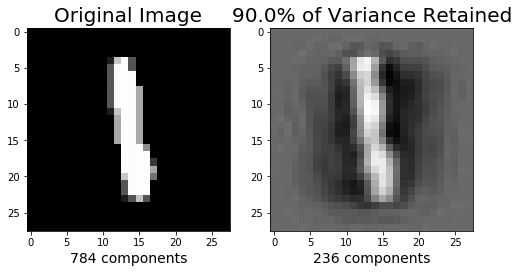

In [65]:
#plot after pca
plt.figure(figsize=(8,4));

n = 200 #index value, change to view different data

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(xTr.iloc[n].values.reshape(28,28),
              cmap = plt.cm.gray,);
plt.xlabel(str(xTr.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(28,28),
              cmap = plt.cm.gray,);
plt.xlabel(str(pcaxTr.shape[1]) +' components', fontsize = 14)
plt.title(str(0.9 * 100) + '% of Variance Retained', fontsize = 20);

print(yTr.iloc[n])

(60000, 236)

In [19]:
%%HTML
<h3> Perform Kmeans Clustering </h3>

In [67]:
kmeans =KMeans()

In [68]:
#set params and n_clusters to k=10
kmeans.set_params(n_clusters=10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
#fit model
kmeans.fit(pcaxTr,yTr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
#check labels
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
#make kmeans prediction on pca xTr
predict = kmeans.predict(pcaxTr)

In [77]:
#filter based on prediction
xTr0 = pcaxTr[predict==0]
xTr1 = pcaxTr[predict==1]
xTr2 = pcaxTr[predict==2]
xTr3 = pcaxTr[predict==3]
xTr4 = pcaxTr[predict==4]
xTr5 = pcaxTr[predict==5]
xTr6 = pcaxTr[predict==6]
xTr7 = pcaxTr[predict==7]
xTr8 = pcaxTr[predict==8]
xTr9 = pcaxTr[predict==9]

In [78]:
#check shapes
xTr0.shape, xTr1.shape, xTr2.shape, xTr3.shape, xTr4.shape, xTr5.shape, xTr6.shape, xTr7.shape, xTr8.shape, xTr9.shape

((3479, 236),
 (5839, 236),
 (1906, 236),
 (3801, 236),
 (6873, 236),
 (8896, 236),
 (3116, 236),
 (6172, 236),
 (11104, 236),
 (8814, 236))

In [79]:
#get clusters
centers = kmeans.cluster_centers_

In [80]:
centers.shape

(10, 236)

In [81]:
#get predicted labels
km_predicted_labels = kmeans.labels_

In [83]:
km_predicted_labels.shape

(60000,)

In [85]:
#caluclate kmeans accuracy score. accuracy is 7.47 percent
correct = 0
for i in range(xTr.shape[0]):
    if km_predicted_labels[i] ==yTr[i]:
        correct+=1
print(correct/xTr.shape[0])

0.09921666666666666


In [87]:
%%HTML
<h3> Implement SVM </h3>

In [22]:
%%HTML
<h3> Perform Logistic Regression </h3>

In [86]:
logistic = LogisticRegression()

In [87]:
#fit model
logistic.fit(pcaxTr,yTr)

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#make prediction for train and test
logistic_yTr_pred = logistic.predict(pcaxTr)
logistic_yTe_pred = logistic.predict(pcaxTe)

In [93]:
#find RMSE of train and test. mse(truth,pred)
logistic_train_rmse = math.sqrt(mean_squared_error(yTr,logistic_yTr_pred))
logistic_test_rmse = math.sqrt(mean_squared_error(yTe, logistic_yTe_pred))
print("The train RMSE is: %f" %logistic_train_rmse)
print("The test RMSE is: %f" %logistic_test_rmse)

The train RMSE is: 1.164138
The test RMSE is: 1.191386


In [94]:
%%HTML
<h3> Perform Decision Tree </h3>

In [95]:
#define model
tree_model = tree.DecisionTreeClassifier()

In [96]:
#fit the model
tree_model.fit(pcaxTr,yTr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
#make prediction for test and train
tree_yTr_pred = tree_model.predict(pcaxTr)
tree_yTe_pred = tree_model.predict(pcaxTe)


In [98]:
#find RMSE
tree_train_rmse = math.sqrt(mean_squared_error(yTr, tree_yTr_pred))
tree_test_rmse = math.sqrt(mean_squared_error(yTe,tree_yTe_pred))
print("The train RMSE is: %f" %tree_train_rmse)
print("The Train RMSE is: %f" %tree_test_rmse)

The train RMSE is: 0.000000
The Train RMSE is: 1.659669
